data preparation, untuk menyiapkan data untuk classification 

In [0]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt

In [3]:
from google.colab import files
uploaded = files.upload()

Saving fifa20.csv to fifa20.csv


In [4]:
import io
dataset = pd.read_csv(io.BytesIO(uploaded['fifa20.csv']))
dataset.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,...,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,...,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,...,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,...,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,...,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,2019-07-01,2024.0,LF,10.0,91.0,83.0,86.0,94.0,35.0,66.0,NaN,NaN,NaN,...,54,41,87,89,88,91,34,27,22,11,12,6,8,8,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,89+3,89+3,83+3,83+3,83+3,89+3,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [5]:
#melakukan pemotongan data
dataset = pd.DataFrame(dataset, columns=["sofifa_id",'age', 'height_cm', 'weight_kg','overall', 'potential','skill_moves'])
dataset

,sofifa_id,age,height_cm,weight_kg,overall,potential,skill_moves
0,158023,32,170,72,94,94,4
1,20801,34,187,83,93,93,5
2,190871,27,175,68,92,92,5
3,200389,26,188,87,91,93,1
4,183277,28,175,74,91,91,4
...,...,...,...,...,...,...,...
18273,245006,22,186,79,48,56,2
18274,250995,22,177,66,48,56,2
18275,252332,19,186,75,48,56,2
18276,251110,18,185,74,48,54,2


In [6]:
#mencek data missing
dataset.describe()

,sofifa_id,age,height_cm,weight_kg,overall,potential,skill_moves
count,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000
mean,219738.864482,25.283291,181.362184,75.276343,66.244994,71.546887,2.368038
std,27960.200461,4.656964,6.756961,7.047744,6.949953,6.139669,0.765038
min,768.000000,16.000000,156.000000,50.000000,48.000000,49.000000,1.000000
25%,204445.500000,22.000000,177.000000,70.000000,62.000000,67.000000,2.000000
50%,226165.000000,25.000000,181.000000,75.000000,66.000000,71.000000,2.000000
75%,240795.750000,29.000000,186.000000,80.000000,71.000000,75.000000,3.000000
max,252905.000000,42.000000,205.000000,110.000000,94.000000,95.000000,5.000000


In [7]:
print(dataset.shape)

(18278, 7)


mengeksplorasi data mana yang berkorelasi, berhubungann

In [8]:
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
%matplotlib inline 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <a list of 7 Text major ticklabel objects>)

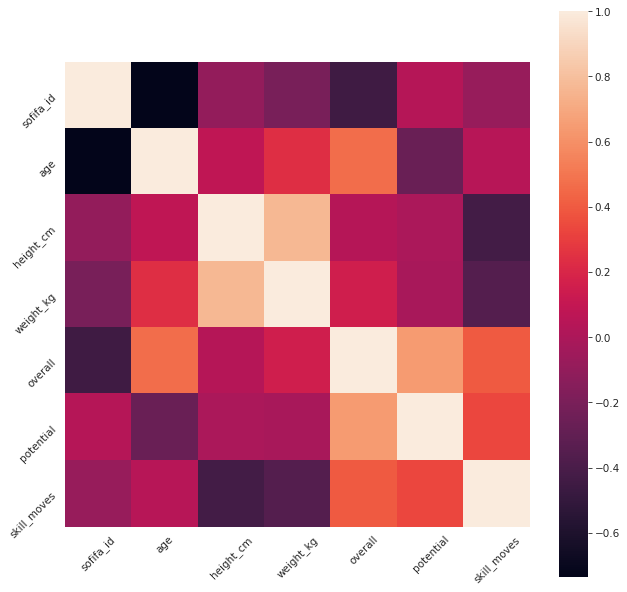

In [9]:
#melihat korelasi antar data
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 75
corr = dataset.select_dtypes(include = ['float64', 'int64']).iloc[:, :].corr()
plt.figure(figsize=(10, 10))
ax = sns.heatmap(corr, vmax=1, square=True)
plt.xticks(rotation=45)
plt.yticks(rotation=45)

In [10]:
#data untuk classification
clas = pd.DataFrame(dataset, columns=['height_cm', 'weight_kg', 'skill_moves'])
clas

,height_cm,weight_kg,skill_moves
0,170,72,4
1,187,83,5
2,175,68,5
3,188,87,1
4,175,74,4
...,...,...,...
18273,186,79,2
18274,177,66,2
18275,186,75,2
18276,185,74,2


In [0]:
#menyimpan dataset Classification
clas.to_csv("classification.csv", index = False)

melakukan train split data

In [0]:
import numpy as np
from sklearn.model_selection import train_test_split

In [14]:
datatrain = np.array(pd.DataFrame(dataset, columns=['skill_moves']))
datatrain[:,0]

array([4, 5, 5, ..., 2, 2, 2])

In [15]:
datatrain1 = pd.DataFrame(dataset, columns=['height_cm', 'weight_kg'])
datatrain1 = np.array(datatrain1)
datatrain1

array([[170,  72],
       [187,  83],
       [175,  68],
       ...,
       [186,  75],
       [185,  74],
       [182,  78]])

In [0]:
#pakai ini langsung untuk ngerandom data dibagi tes sizenya
X_train, X_test, y_train, y_test = train_test_split(datatrain1, datatrain, test_size=0.30, random_state=42)

In [17]:
#menyimpan data tinggi badan dan berat badan
X_train

array([[181,  69],
       [189,  89],
       [174,  76],
       ...,
       [193,  89],
       [191,  86],
       [188,  78]])

In [18]:
#menyimpan data skill_moves
y_train

array([[2],
       [3],
       [3],
       ...,
       [1],
       [3],
       [2]])

alasan menggunakan naive bayes: karna bisa di gunakan untuk data kuantitatif maupun kualitatif, perhitungannya cepat,codingannya mudah sederhana dan mudah dipahami. 

In [0]:
#menggunakan naive bayes
from sklearn.naive_bayes import CategoricalNB

In [20]:
clf = CategoricalNB()
clf.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CategoricalNB(alpha=1.0, class_prior=None, fit_prior=True)

In [21]:
X_test

array([[183,  79],
       [186,  80],
       [185,  80],
       ...,
       [180,  79],
       [171,  66],
       [189,  85]])

In [0]:
hasil = clf.predict(X_test)

In [23]:
#evaluating classification
from sklearn.metrics import classification_report
print(classification_report(y_test,hasil))

              precision    recall  f1-score   support

           1       0.44      0.41      0.42       608
           2       0.53      0.56      0.54      2591
           3       0.50      0.54      0.52      1974
           4       0.33      0.00      0.01       299
           5       0.00      0.00      0.00        12

    accuracy                           0.50      5484
   macro avg       0.36      0.30      0.30      5484
weighted avg       0.49      0.50      0.49      5484



alasan menggunakan svm: svm adalah algoritma supervised untuk klasifikasi yang bekerja dengan mencari hyperplane dengan margin terbesar.

In [0]:
#menggunakan SVM
from sklearn import svm
from sklearn.svm import SVC

In [25]:
cl = svm.SVC()
cl.fit(X_train, y_train)
SVC()

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [26]:
X_test

array([[183,  79],
       [186,  80],
       [185,  80],
       ...,
       [180,  79],
       [171,  66],
       [189,  85]])

In [0]:
hasil2 = cl.predict(X_test)

In [28]:
#evaluating classification
from sklearn.metrics import classification_report
print(classification_report(y_test,hasil2))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       608
           2       0.50      0.83      0.62      2591
           3       0.53      0.32      0.40      1974
           4       0.00      0.00      0.00       299
           5       0.00      0.00      0.00        12

    accuracy                           0.51      5484
   macro avg       0.21      0.23      0.20      5484
weighted avg       0.43      0.51      0.44      5484



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


kesimpulan dari classification ini, akurasi menggunakan naive bayes sebesar 50% sedangkan dengan SVM sebesar 51%.
HAsil akurasi SVM lebih tinggi dan lebih baik dari naivebayes